## Diabetes Prediction on Electronic Medical Records (EMR) Data

### 1. Imports

In [2]:
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import pandas as pd
import pylab as pl
import random

### 2. Load & Prep Data

In [3]:
df = pd.read_csv('./DATA/emr.csv')

In [4]:
df.head()

,class,bmi,diastolic_bp_change,systolic_bp_change,respiratory_rate
0,No,16.192875,14.000000,19.000000,2.146700
1,No,13.383857,4.000000,3.000000,0.000000
2,No,28.554000,6.000000,12.000000,2.065591
3,No,3.536667,5.725649,1.635738,0.571832
4,No,16.561000,11.451297,8.728523,2.099426


In [5]:
df.shape

(9948, 5)

### 3. Exploratory Data Analysis

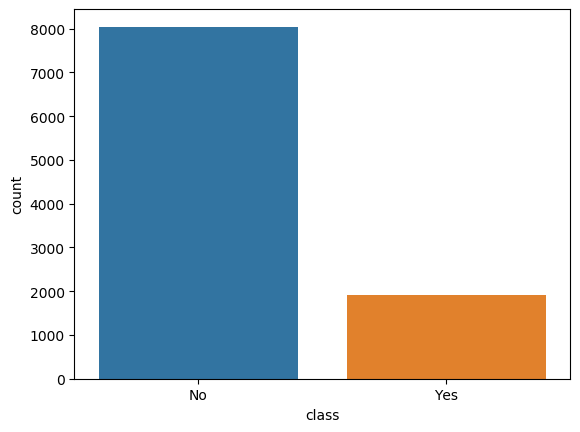

In [6]:
sns.countplot(df['class'],label='Count')
plt.show()

<b>Box Plot and Histograms</b><br>
Visualize distribution of the Input Variables

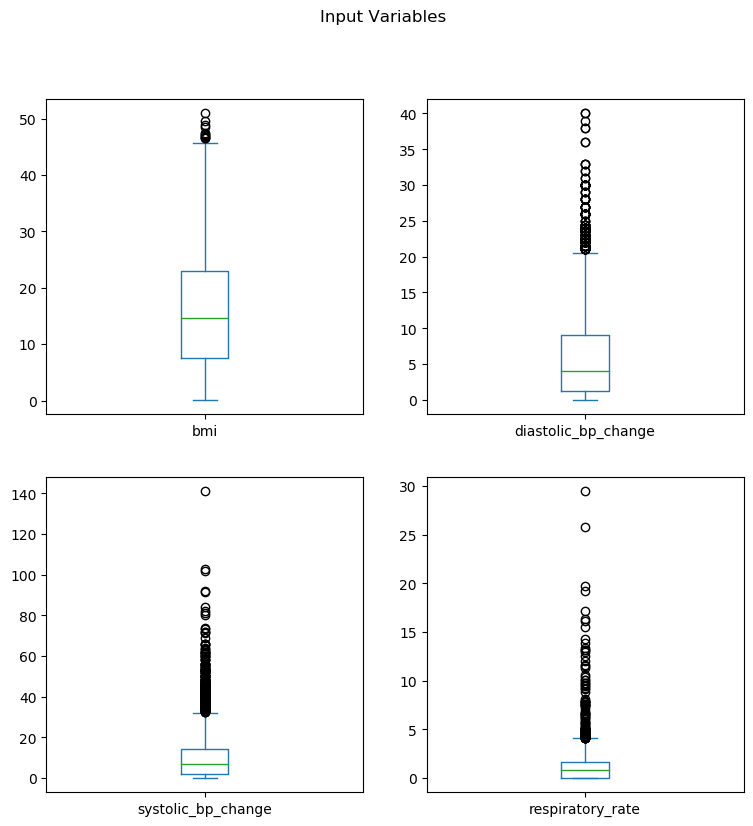

In [7]:
df.plot(kind='box', 
        subplots=True, 
        layout=(2,2), 
        sharex=False, 
        sharey=False, 
        figsize=(9,9), 
        title='Input Variables')
plt.show()

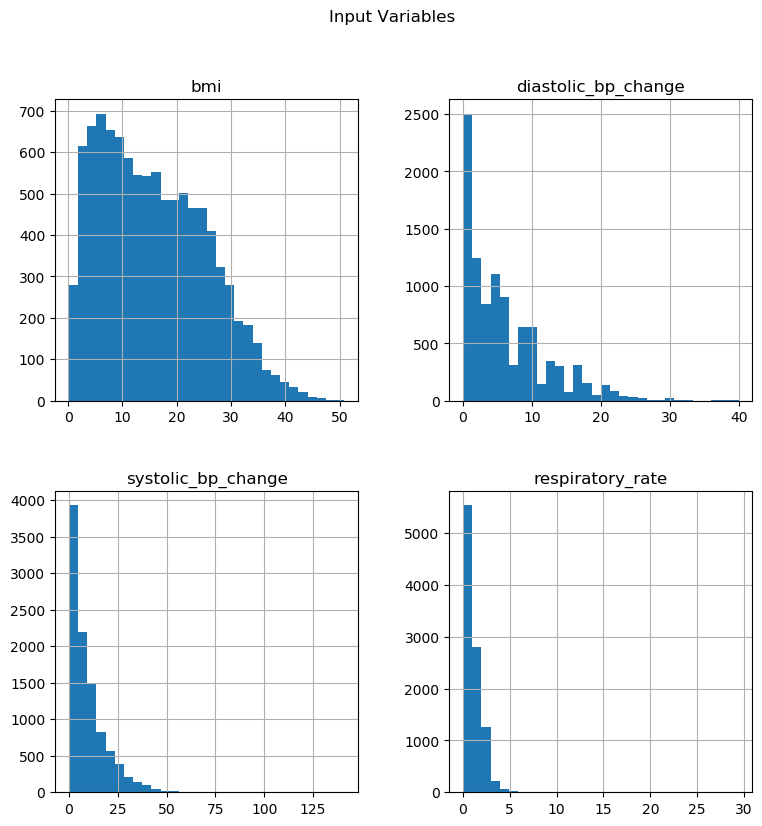

In [8]:
df.hist(bins=30, figsize=(9,9))
pl.suptitle("Input Variables")
plt.show()

Descriptive Statistics

In [9]:
df.describe()

,bmi,diastolic_bp_change,systolic_bp_change,respiratory_rate
count,9948.000000,9948.000000,9948.000000,9948.000000
mean,15.732258,5.881994,9.591503,1.021472
std,9.703593,5.896722,10.371288,1.231041
min,0.122124,0.000000,0.000000,0.000000
25%,7.455795,1.225649,2.000000,0.000000
50%,14.613946,4.000000,6.728523,0.836660
75%,22.918650,9.000000,14.000000,1.634458
max,50.900000,40.000000,141.000000,29.444864


### 4. Scale, Split & Create Train/Test Datasets

In [10]:
X = df[['bmi', 'diastolic_bp_change', 'systolic_bp_change', 'respiratory_rate']]
y = df['class']

#### Encode the classes into numerical values using Sklearn's LabelEncoder

In [11]:
label_encoder = LabelEncoder()
label_encoder.fit(['Yes', 'No'])
y = label_encoder.transform(y)

In [12]:
y

array([0, 0, 0, ..., 0, 0, 0])

#### Split X, y into Train and Test Sets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [14]:
X_train.shape

(7461, 4)

In [15]:
X_test.shape

(2487, 4)

#### Scale Feature Columns

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Combine Scaled X & y into Train and Test DataFrames 

In [17]:
X_train = pd.DataFrame(X_train, columns=['bmi', 'diastolic_bp_change', 'systolic_bp_change', 'respiratory_rate'])
y_train = pd.DataFrame(y_train, columns=['class'])
train_df = pd.concat([y_train, X_train], axis=1)
train_df.head()

,class,bmi,diastolic_bp_change,systolic_bp_change,respiratory_rate
0,0,-1.483765,-1.003436,-0.927406,-0.817379
1,1,0.947850,-1.003436,-0.927406,-0.662177
2,0,-1.034765,2.206180,2.057467,-0.817379
3,0,-1.406122,0.179054,-0.445975,-0.817379
4,0,0.366195,-0.665582,0.228029,-0.431359


In [18]:
X_test = pd.DataFrame(X_test, columns=['bmi', 'diastolic_bp_change', 'systolic_bp_change', 'respiratory_rate'])
y_test = pd.DataFrame(y_test, columns=['class'])
test_df = pd.concat([y_test, X_test], axis=1)
test_df.head()

,class,bmi,diastolic_bp_change,systolic_bp_change,respiratory_rate
0,0,-0.940089,-0.403964,-0.279542,-0.817379
1,0,-0.502614,-0.665582,0.131742,-0.362450
2,0,1.078473,0.347981,0.228029,-0.817379
3,1,-0.636164,-0.251491,0.587034,-0.817379
4,1,-0.528479,2.037253,1.383463,0.185934


#### Create a DataFrame for Batch Inference without the Class column

In [19]:
batch_test_df = test_df.drop(['class'], axis=1)
batch_test_df.head()

,bmi,diastolic_bp_change,systolic_bp_change,respiratory_rate
0,-0.940089,-0.403964,-0.279542,-0.817379
1,-0.502614,-0.665582,0.131742,-0.362450
2,1.078473,0.347981,0.228029,-0.817379
3,-0.636164,-0.251491,0.587034,-0.817379
4,-0.528479,2.037253,1.383463,0.185934


#### Write Train & Test Sets to Local Directory

In [20]:
train_df.to_csv('./DATA/train/train.csv', header=False, index=False)
test_df.to_csv('./DATA/test/test.csv', header=False, index=False)
batch_test_df.to_csv('./DATA/batch_test/batch_test.csv', header=False, index=False)

<b>Write train_df with class label and with header for Model Monitoring Baselining</b>

In [21]:
train_df.to_csv('./DATA/train/train_with_header.csv', header=True, index=False)

### Let us simulate some artificial data for Model Monitor for our Data Shift experiments later

In [22]:
def get_random_val():
    val = random.uniform(0, 1)
    return round(val, 6)

In [23]:
def generate_row():
    row = []
    for _ in range(4):
        row.append(get_random_val())
    return row  

In [24]:
def generate_dataset():
    rows = []
    for _ in range(20):
        rows.append(generate_row())
    return rows 

In [25]:
rows = generate_dataset() 

In [26]:
df = pd.DataFrame(rows, columns=['bmi', 'diastolic_bp_change', 'systolic_bp_change', 'respiratory_rate'])

In [27]:
df.head()

,bmi,diastolic_bp_change,systolic_bp_change,respiratory_rate
0,0.896032,0.812798,0.202758,0.561720
1,0.694919,0.819192,0.346334,0.691649
2,0.466557,0.781476,0.832214,0.971236
3,0.003296,0.070368,0.422260,0.925840
4,0.709317,0.572891,0.700591,0.215341


In [28]:
df.to_csv('./DATA/test/model_monitor_test.csv', header=False, index=False)

<b>Note: </b> Manually modify columns of model_monitor_test.csv to create violations <br>
E.g., change float to integral values, change values to be negative or larger